## Ana Beatriz Bertolucci Henriques e Anna Beathriz Cipriano de Mauro

# Sugestão Spotify

<h2><p>I. Objetivo principal do projeto:</p></h2>
<p style = "text-indent:4em">Recomendar músicas para o usuário, dada uma playlist.</p>
<h2><p>II. Técnicas utilizadas:</p></h2>
<ol>
    <li>
        <b>Clusterização:</b> dividindo as músicas por meio da análise de algumas variáveis mais relacionadas ao som
    </li>
    <li>
        <b>Classificação:</b> classificando os dados por meio da letra da música
    </li>
</ol>
<h2><p>III. Exigências do projeto:</p></h2>
<ol>
    <li>
        Aprender a mexer com <b>API do Spotify</b> para se obter as variáveis das músicas e, depois, para adicionar uma playlist com as músicas recomendadas
    </li>
    <li>
        Criar uma <b>Base de Dados</b> própria, já clusterizada e classificada para servir de referência
    </li>
    <li>
        Aprender a mexer com <b>API do Musixmatch</b> para se obter a letra de novas músicas
    </li>
    <li>
        Validar a clusterização utilizando uma <b>árvore de decisão</b>
    </li>
    <li>
        Criar uma <b>interface Tkinter</b> para ser utilizada pelo usuário
    </li>
</ol>

<h2>IV. Metodologia</h2>
<p style = "text-indent:4em">
    Para se atigir o objetivo, decidiu-se dividir o projeto em etapas, visando uma maior organização.
</p>
<p>
    <h3>1) Criação de um Dataframe adequado:</h3>
</p>
<p  style = "text-indent:4em">
    Procurando por possíveis Datasets a serem utilizados, encontrou-se um o qual contem variáveis relevantes: o nome da música, a letra e o nome do artista. Esse Dataset foi obtido de <a href = "https://www.kaggle.com/mousehead/songlyrics" target = '_blank'>https://www.kaggle.com/mousehead/songlyrics</a>. A partir disso, houve a formatação e limpeza de dados. Neste processo, foi necessário:</p>
    <ol>
        <li>Ler o arquivo e transformá-lo em um DataFrame</li>
        <li>A partir do nome da música e do artista, obter o ID do Spotify de cada música</li>
        <li>A partir do ID, obter as variáveis relacionadas ao som de cada música</li>
    </ol>

<p style = "text-indent:4em">
    Realizando esse processo 20 vezes, obteve-se um DataFrame com 2000 músicas e suas variáveis, já que o Spotify permite que sejam lidas apenas 100 músicas por vez. Por fim, guardou-se o resultado no arquivo nomeado <a href = 'certo.csv' target = '_black'>certo.csv</a>.
</p>

<p>
    <h3>2) Clusterização:</h3>
</p>

<p style = "text-indent:4em">
    Buscando entender mais sobre essa técnica e como ela poderia ser relacionada com o projeto em questão, analisou-se o exemplo de distribuição presente na <em><b>Figura 1</b></em> e criou-se o arquivo <a href = 'Tipos de Clusterização.ipynb' target = '_blank'>Tipos de Clusterização</a>, com o código de vários possíveis métodos de separação utilizando a mesma base de dados.
</p>
<img src = 'comparação-cluster.png' width = 80%/>
<p><em><b>Figura 1:</b></em> Comparação entre técnicas de Clusterização. Imagem retirada de <a>http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html</a></p>
<p style = "text-indent:4em">
    Além disso, decidiu-se que as variáveis que seriam levadas em consideração no processo seriam: tempo, valence e energy, pois foram definidas como as mais pertinentes para cumprir com os objetivos do projeto. Além disso, através da análise dos gráficos presentes na <em><b>Figura 2</b></em>, percebeu-se que essas variáveis não possuem uma associação muito evidente (formam uma 'nuvem'), além de não possuírem muitos pontos discrepantes, como ocorre com outras variáveis e afetaria a análise.
</p>

In [1]:
#Importando Bibliotecas que serão utilizadas
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn import metrics
from scipy.spatial.distance import cdist, pdist, squareform
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import mixture
import scipy
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials
import requests
import json
from Musixmatch_codigo import Musixmatch
import csv
import nltk 
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer 
import operator
from sklearn import tree
import seaborn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text  import  TfidfVectorizer 
from  sklearn.feature_extraction.text  import  TfidfTransformer 
from sklearn.naive_bayes import MultinomialNB
from tkinter import *
import tkinter.font as tkFont
import tkinter.ttk as ttk
from __future__ import print_function
import os
from spotipy import oauth2
from tkinter import simpledialog

<img src = 'seab.png'/>

<em><b>Figura 2</b></em>: Imagem dos gráficos obtidos por meio do modulo seaborn para analisar a dispersão das variáveis

<p style = "text-indent:4em">
    Desse modo, filtrou-se o Dataset para que o mesmo tivesse apenas as variáveis desejadas.
</p>
<p style = "text-indent:4em">
    A partir disso e sabendo que a dispersão de dados entre essas variáveis é uma "nuvem", como está sendo representado no <em><b>Gráfico 1</b></em>, decidiu-se utilizar a técnica K-Means para realizar a clusterização.
</p>

In [2]:
dados = pd.read_csv('certo.csv')

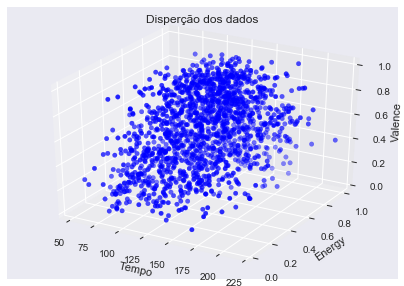

In [3]:
fig = plt.figure(figsize=[7,5])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dados.tempo,dados.energy,  dados.valence,marker = 'o',c='blue')
ax.set_title('Disperção dos dados')
ax.set_xlabel('Tempo')
ax.set_ylabel('Energy')
ax.set_zlabel('Valence')
plt.show()

m><b>Gráfico 1:</b></em> Gráfico de dispersão dos dados em relação as variáveis Tempo, Valence e Energy

<p><h3>Método Kmeans</h3></p>

<p style = "text-indent:4em">
    Para utilizar o método K-means, no momento de decidir em quantos clusters seriam separados, optou-se por utilizar o "Elbow Method". Porém, como é possível perceber no <em><b>Gráfico 2</b></em>, o "cotovelo" não fica tão nítido. Desse modo, percebendo, também, que aumentando o número de clusters só aumentava o número de faixas dividindo a variável Tempo, o que não era vantajoso, optou-se por dividir primeiramente em 3 Clusters, já que é um nível em que a diminuição na distorção já é menor
</p>

In [4]:
x1 = dados.energy
x2 = dados.tempo
x3= dados.valence
X = np.array(list(zip(x1,x2,x3))).reshape(len(x1), 3)
L=X #variável sera usada na validação da clusterização

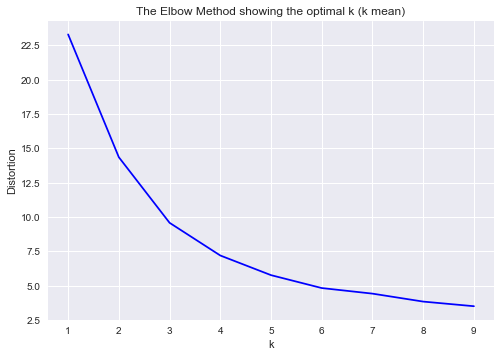

In [5]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k (k mean)')
plt.show()

<p style = "text-indent:4em">
    Utilizando essa técnica para a divisão em 3 clusters, obteve-se o <em><b>Gráfico 3</b></em> e a <em><b>Tabela 1</b></em>
</p>

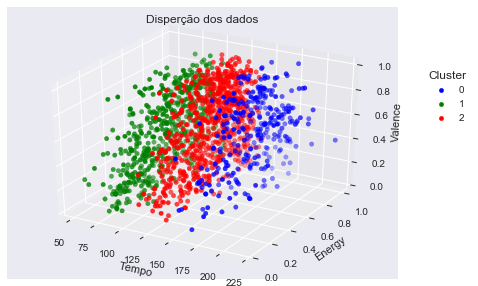

In [6]:
kmean = cluster.KMeans(n_clusters=3).fit(X)
labels_kmean = kmean.labels_
dados.loc[:,'Cluster'] = labels_kmean
fig = plt.figure(figsize=[7,5])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dados.tempo[dados.Cluster==0],dados.energy[dados.Cluster==0],  dados.valence[dados.Cluster==0],marker = 'o',c='blue', label='0')
ax.scatter(dados.tempo[dados.Cluster==1],dados.energy[dados.Cluster==1], dados.valence[dados.Cluster==1],marker = 'o',c='green', label='1')
ax.scatter(dados.tempo[dados.Cluster==2],dados.energy[dados.Cluster==2],dados.valence[dados.Cluster==2],marker = 'o',c='red', label = '2')
ax.set_title('Disperção dos dados')
ax.set_xlabel('Tempo')
ax.set_ylabel('Energy')
ax.set_zlabel('Valence')
plt.legend(bbox_to_anchor=(1.2, 0.8), ncol=1, title='Cluster')
plt.show()

<em><b>Gráfico 3:</b></em> Gráfico de dispersão com divisão entre Clusters

In [7]:
clusters = [{'Cluster':0}, {'Cluster':1}, {'Cluster':2}]
clust = pd.DataFrame(clusters)
minemax = [{'Mínimo' : min(dados.energy[dados.Cluster==0]), 'Máximo' :  max(dados.energy[dados.Cluster==2])},
           {'Mínimo' : min(dados.energy[dados.Cluster==1]), 'Máximo' :  max(dados.energy[dados.Cluster==1])},
          {'Mínimo' : min(dados.energy[dados.Cluster==2]), 'Máximo' :  max(dados.energy[dados.Cluster==0])}]
analise = pd.DataFrame(minemax)
analise = analise[['Mínimo','Máximo']]

minemax2 = [{'Mínimo' : min(dados.valence[dados.Cluster==0]), 'Máximo' :  max(dados.valence[dados.Cluster==2])},
           {'Mínimo' : min(dados.valence[dados.Cluster==1]), 'Máximo' :  max(dados.valence[dados.Cluster==1])},
          {'Mínimo' : min(dados.valence[dados.Cluster==2]), 'Máximo' :  max(dados.valence[dados.Cluster==0])}]
analise2 = pd.DataFrame(minemax2)
analise2 = analise2[['Mínimo','Máximo']]

minemax3 = [{'Mínimo' : min(dados.tempo[dados.Cluster==0]), 'Máximo' :  max(dados.tempo[dados.Cluster==1])},
            {'Mínimo' : min(dados.tempo[dados.Cluster==1]), 'Máximo' :  max(dados.tempo[dados.Cluster==2])},
          {'Mínimo' : min(dados.tempo[dados.Cluster==2]), 'Máximo' :  max(dados.tempo[dados.Cluster==0])}]
analise3 = pd.DataFrame(minemax3)
analise3 = analise3[['Mínimo','Máximo']]



In [8]:
pd.concat([clust.reset_index(drop=1),analise.reset_index(drop=1).add_suffix(' energy'),
           analise2.reset_index(drop=1).add_suffix(' valence'),
           analise3.reset_index(drop=1).add_suffix(' tempo')], axis=1).fillna('')

,Cluster,Mínimo energy,Máximo energy,Mínimo valence,Máximo valence,Mínimo tempo,Máximo tempo
0,0,0.0259,0.992,0.0334,0.984,146.776,108.579
1,1,0.0223,0.995,0.0378,0.968,51.952,146.367
2,2,0.0170,0.997,0.0396,0.969,108.665,217.897


<em><b>Tabela 1</b></em>: Tabela contendo os valores máximos e mínimos de cada variável em cada Cluster

<p style = "text-indent:4em">
    A partir da análise da <em><b>Tabela 1</b></em>, percebe-se que os Clusters estão sendo divididos em função apenas da variável Tempo. Por isso, acreditou-se que apenas essa divisão não era suficiente para agrupar os dados. Desse modo, decidiu-se realizar o processo de clusterização por K-means novamente, utilizando como referencial cada cluster obtido anteriormente. Nesta etapa, optou-se, primeiramente por utilizar o método do cotovelo na determinação do número de clusters, porém percebeu-se pelo gráfico que a divisão entre os dados não era muito boa, além de que, no momento da validação, isso gerou uma maior porcentagem de erro. Por fim, optou-se por dividir cada região em dois clusters, obtendo-se, por fim, o <em><b>Gráfico 4</b></em>.
</p>

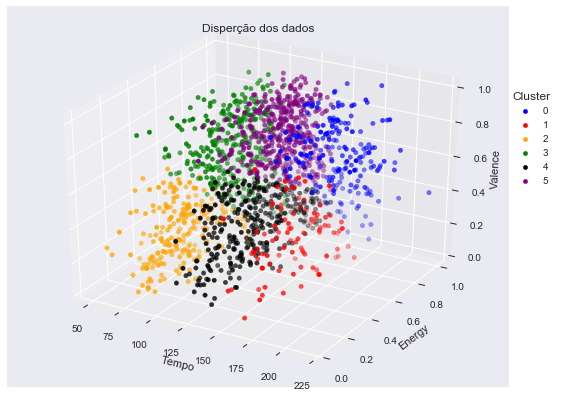

In [9]:
#Dados presentes no Cluster 0
dados_0= dados[dados.Cluster==0]
x4 = dados_0.energy
x5 = dados_0.valence
X2 = np.array(list(zip(x4,x5))).reshape(len(x4), 2)
kmean = cluster.KMeans(n_clusters=2).fit(X2)
labels_kmean2 = kmean.labels_
dados.loc[dados.Cluster==0,'Clusterfinal'] = labels_kmean2

#Dados presentes no Cluster 1
dados_1= dados[dados.Cluster==1]
x6 = dados_1.energy
x7 = dados_1.valence
X3 = np.array(list(zip(x6,x7))).reshape(len(x6), 2)
kmean = cluster.KMeans(n_clusters=2).fit(X3)
labels_kmean3 = kmean.labels_
dados.loc[dados.Cluster==1,'Clusterfinal'] = labels_kmean3+2

#Dados presentes no Cluster 2
dados_2= dados[dados.Cluster==2]
x8 = dados_2.energy
x9 = dados_2.valence
X4 = np.array(list(zip(x8,x9))).reshape(len(x8), 2)
kmean = cluster.KMeans(n_clusters=2).fit(X4)
labels_kmean = kmean.labels_
dados.loc[dados.Cluster==2,'Clusterfinal'] = labels_kmean+4

dados.drop('Cluster',axis=1)

#Gráfico com todos os clusters
fig = plt.figure(figsize=[9,7])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dados.tempo[dados.Clusterfinal==0],dados.energy[dados.Clusterfinal==0],  dados.valence[dados.Clusterfinal==0],marker = 'o',c='blue', label='0')
ax.scatter(dados.tempo[dados.Clusterfinal==1],dados.energy[dados.Clusterfinal==1],  dados.valence[dados.Clusterfinal==1],marker = 'o',c='red', label='1')
ax.scatter(dados.tempo[dados.Clusterfinal==2],dados.energy[dados.Clusterfinal==2],  dados.valence[dados.Clusterfinal==2],marker = 'o',c='orange', label='2')
ax.scatter(dados.tempo[dados.Clusterfinal==3],dados.energy[dados.Clusterfinal==3],  dados.valence[dados.Clusterfinal==3],marker = 'o',c='green', label='3')
ax.scatter(dados.tempo[dados.Clusterfinal==4],dados.energy[dados.Clusterfinal==4],  dados.valence[dados.Clusterfinal==4],marker = 'o',c='black', label='4')
ax.scatter(dados.tempo[dados.Clusterfinal==5],dados.energy[dados.Clusterfinal==5],  dados.valence[dados.Clusterfinal==5],marker = 'o',c='purple', label='5')
ax.set_title('Disperção dos dados')
ax.set_xlabel('Tempo')
ax.set_ylabel('Energy')
ax.set_zlabel('Valence')
plt.legend(bbox_to_anchor=(1.1, 0.8), ncol=1, title='Cluster')
plt.show()

<em><b>Gráfico 4:</b></em> Gráfico final de dispersão com divisão entre Clusters

<h3>Validação dos clusters</h3>

<p style = "text-indent:4em">
    Para validar os resultados obtidos, utilizou-se o método de árvore de decisão. Com ela é possível se analisar se há coerência na divisão dos clusters, além de se obter um Classificador desses grupos.
</p>
<p style = "text-indent:4em">
    O processo para essa validação é semelhante ao Naive-Bayes, portanto, primeiramente separou-se os dados em treinamento e teste para depois serem inseridos no código de Classificação.
</p>

In [10]:
#separando dataframe em treinamento e teste
trei=dados[0:750] #treinamento
tes=dados[751:1553] #teste
X=L[0:750] #o que foi classificado no treinamento
K=L[751:1553] #o que deve ser classificado

In [11]:
model = tree.DecisionTreeClassifier(criterion='gini')
model.fit(X, trei['Clusterfinal'])
model.score(X, trei['Clusterfinal'])
#Predict Output
predicted= model.predict(K)

#porcentagem de acertos:
manxdig=pd.crosstab(predicted,tes['Clusterfinal'],margins=True,rownames=['Digital'] , colnames=['Manual'], normalize=True)*100
print('\033[1m'+'  Classificação Manual X Digital')
manxdig

  Classificação Manual X Digital


Manual,0.0,1.0,2.0,3.0,4.0,5.0,All
Digital,,,,,,,
0.0,12.219451,0.997506,0.000000,0.000000,0.000000,0.000000,13.216958
1.0,0.623441,4.364090,0.000000,0.000000,0.000000,0.000000,4.987531
2.0,0.000000,0.000000,12.967581,0.374065,0.000000,0.000000,13.341646
3.0,0.000000,0.000000,0.374065,19.576060,0.000000,0.000000,19.950125
4.0,0.000000,0.000000,0.000000,0.000000,18.952618,0.997506,19.950125
5.0,0.000000,0.000000,0.000000,0.000000,0.623441,27.930175,28.553616
All,12.842893,5.361596,13.341646,19.950125,19.576060,28.927681,100.000000


<em><b>Tabela 2:</b></em> Tabela comparando a classificação feita pela árvore de decisão (Digital) e a obtida pela Clusterização (Manual)

<p style = "text-indent:4em">
    Analisnado a <em><b>Tabela 2</b></em>, pode-se concluir que a clusterização é satisfatória e que a árvore de decisão possui um baixo índice de erro.
</p>

<p>
    <h3>3) Classificação:</h3>
</p>

<p style = "text-indent:4em">
    Para utilizar a letra da música também como um parâmetro de análise, utilizou-se a técnica de classificação. Procurando saber mais sobre como vários métodos funcionariam em nossa base de dados, criou-se o arquivo <a href='Tipos de Classificação.ipynb' target='_blank'>Tipos de Classificação</a>. Feito isso, foi possível perceber que a classificação mais eficiente foi aquela que utilizou os métodos N-grams, Naive-Bayes, Tf-Idf e Steam Extraction. Segue abaixo uma breve explicação de cada um destes:
</p>

<h4>I) N-grams:</h4>
<p style = "text-indent:4em">Leva em consideração conjuntos de palavras e suas correlações na frase. Objetivando incluir este método, deve -se aplicar condições no código nas quais a palavra dependerá das posições das “n” palavras anteriores.</p>

<h4>II) Tf-Idf (Frequência do termo inverso da frequência nos documentos):</h4>
<p style = "text-indent:4em">A importância de uma palavra aumenta de acordo com o número de ocorrências durante a classificação, porém esse número é equilibrado considerando a frequência desta mesma palavra nos dois grupos de relevância. Caso sua frequência seja alta em ambos significa que sua importância na classificação deveria ser reduzida, esse é o caso de palavras costumeiramente presentes no decorrer de uma frase tais como artigos. No código deve-se calcular a frequência em cada classificação (Tf) e calcular a presença em ambos (Idf) multiplicando os dois resultados obtendo-se a frequência equilibrada da palavra(Tf-Idf).</p>

<h4>III) Stem Extraction:</h4>
<p style = "text-indent:4em">Extrair o radical das palavras para analisar o seu sentido principal. Reunindo as diferentes maneiras de se escrever as palavras como com diminutivo e plural, classificando "balas" e "bala" da mesma maneira, já que, essencialmente, são iguais. </p>

<h4>IV) Naive-Bayes:</h4>
<p style = "text-indent:4em">Pega a frequencia das palavras em cada uma das situações e, com base nisso, analisa se a probabilidade daquela frase aparecer em determinado grupo é maior do que no outro e classifica desse modo</p>

<p style = "text-indent:4em">Feita manualmente a classificação da letra em relação a sua positividade e depois se a mesma discorre ou não sobre o amor, iniciou-se a utilização do classificador</p>

<h3>Limpando Dataset</h3>

In [12]:
f='class7'
d='a/na'
teste=pd.read_excel("treinamento.xlsx") # teste com dados classificados manualmente
treinamento=pd.read_excel("testemusicas.xlsx") # treinamento com dados classificados manualemnte

#Tranformar todas as letras em minusculas:
teste['letra'] = teste['letra'].str.lower() 
treinamento['letra'] = treinamento['letra'].str.lower()

#Limpando o dataset treinamento
for i in range(len(treinamento)):
    caract=[',',';','.','!','?',"(",")", ':', '"', "'",]      #caracteres que se desejam retirar
    palavras = treinamento.loc[i,('letra')].split()         # criando lista de listas de palavras em cada mensagem
    letras=[]                                              #lista de lista de letras das palvras
    final=[]                                                #lista de mensagens no final do processo
    for x in palavras:#passando palavra por palavra
        letrasporpalavra=[]                                #lista que irá conter as letras das palavras no for
        for a in range(len(x)):                            #passando letra por letra
            letrasporpalavra.append(x[a].lower())                   #adicionando cada letra na lista
        letras.append(letrasporpalavra)                 #adicionando lista de lista com as letras
    for z in letras:                                    #passando item/lista por lista
        for w in z:                                     #dentro da lista, passando letra por letra
            if w in caract:                            #se estiver entre os caracteres
                d=z.index(w)                           #pega o indice desse caracter
                z[d] = ' '                             #substitui ele na lista por um espaço
    for q in range(len(letras)):                      #q vai passar pelos índices da lista letras (palavra por palavra)
        junto = ''.join(letras[q])#junto vai tranformar a lista de letras em palavras           
        if len(junto)!=0: 
            if junto[0] !='@' and junto[0:5]!='https'and junto!= 'rt' and junto[0:3]!='kkk'and junto[0:2]!="\n":#retira alguns outros itens
                final.append(junto)                 #adiciona na lista final

    treinamento.loc[i,('letra')] = ' '.join(final) #junta as palavras das mensagens e substitui as mensagens 

#limpando teste

for i in range(len(teste)):
    caract=[',',';','.','!','?',"(",")", ':', '"', "'","\n"]      #caracteres que se desejam retirar
    palavras = teste.letra[i].split() # criando lista de listas de palavras em cada mensagem
    letras=[]                                              #lista de lista de letras das palvras
    final=[]                                                #lista de mensagens no final do processo
    for x in palavras:#passando palavra por palavra
        letrasporpalavra=[]                                #lista que irá conter as letras das palavras no for
        for a in range(len(x)):                            #passando letra por letra
            letrasporpalavra.append(x[a].lower())                   #adicionando cada letra na lista
            
        letras.append(letrasporpalavra)                 #adicionando lista de lista com as letras
    for z in letras:                                    #passando item/lista por lista
        for w in z:                                     #dentro da lista, passando letra por letra
            if w in caract:                            #se estiver entre os caracteres
                d=z.index(w)                           #pega o indice desse caracter
                z[d] = ' '                             #substitui ele na lista por um espaço
    for q in range(len(letras)):                      #q vai passar pelos índices da lista letras (palavra por palavra)
        junto = ''.join(letras[q])#junto vai tranformar a lista de letras em palavras           
        if len(junto)!=0: 
            if junto[0] !='@' and junto[0:5]!='https'and junto!= 'rt' and junto[0:3]!='kkk' and junto[0:2]!="\n":#retira alguns outros itens
                final.append(junto)                 #adiciona na lista final

    teste.loc[i,('letra')]= ' '.join(final) #junta as palavras das mensagens e substitui as mensagens 


<h3>Steam</h3>

In [13]:
snowball_stemmer = SnowballStemmer("english") 
for i in range(len(teste)):    
    palavras = teste.letra.iloc[i].split()                # criando lista de listas de palavras em cada mensagem
    letras=[]                                              #lista de lista de letras das palvras
    final=[]                                                #lista de mensagens no final do processo
    for x in palavras:#passando palavra por palavra
        y=snowball_stemmer.stem(x)    #achar raiz da palavra
        final.append(y)                 #adiciona na lista final com raiz da palavra
      
    teste.loc[i,('letra')] = ' '.join(final) #junta as palavras das mensagens e substitui as mensagens de Treinamento
for i in range(len(treinamento)):   
    palavras = treinamento.letra.iloc[i].split()                # criando lista de listas de palavras em cada mensagem
    letras=[]                                              #lista de lista de letras das palvras
    final=[]                                                #lista de mensagens no final do processo
    for x in palavras:#passando palavra por palavra
        y=snowball_stemmer.stem(x)
        final.append(y) 
    treinamento.loc[i,('letra')]= ' '.join(final)#adiciona na lista final a raiz da palavras

<h3> N-gram  + Steam + Tfidf</h3>

<p style = "text-indent:4em">Primeiramente, as  letras das musicas foram classifadas enquanto significados <b><em>positivos</em></b> e significados <b><em>negativos</em></b></p>

In [14]:
p= Pipeline([                       
    ('count_vectorizer',   CountVectorizer(ngram_range=(1, 3))),   # método n-grams
    ('tfidf_transformer',  TfidfTransformer()),  #metodo Tfidf
    ('classifier',  MultinomialNB()) ])

k=p.fit(treinamento['letra'], treinamento[f] ) # ensinando o classificador


predictions = k.predict(teste['letra'])#requisitando precisões do classificador
predictions 
#porcentagem de acertos:
manxdig=pd.crosstab(predictions,teste[f],margins=True,rownames=['Digital'] , colnames=['Manual'], normalize=True)*100
print('\033[1m'+'  Classificação Manual X Digital')
manxdig

  Classificação Manual X Digital


Manual,rb,rg,All
Digital,,,
rb,47.457627,18.644068,66.101695
rg,11.864407,22.033898,33.898305
All,59.322034,40.677966,100.000000


In [15]:
porcacerto = manxdig.rb.rb+manxdig.rg.rg

print('A porcentagem de acerto na classicação no quesito positividade é: {}%'.format(porcacerto))

A porcentagem de acerto na classicação no quesito positividade é: 69.49152542372882%


<p style = "text-indent:4em">A segunda classificação binária deu-se pela presença ou não de um tema recorrente em músicas:<b><em>amor</em></b></p>

In [16]:
p= Pipeline([
    ('count_vectorizer',   CountVectorizer(ngram_range=(1, 3))), # método n-grams
    ('tfidf_transformer',  TfidfTransformer()), #metodo Tfidf
    ('classifier',  MultinomialNB()) ])

l=p.fit(treinamento['letra'], treinamento['a/na'] ) # ensinando o classificador


predictions = l.predict(teste['letra']) #requisitando precisões do classificador
predictions 
#porcentagem de acertos:
manxdig=pd.crosstab(predictions,teste['a/na'],margins=True,rownames=['Digital'] , colnames=['Manual'], normalize=True)*100
print('\033[1m'+'  Classificação Manual X Digital')
manxdig

  Classificação Manual X Digital


Manual,a,na,All
Digital,,,
a,23.728814,16.949153,40.677966
na,8.474576,50.847458,59.322034
All,32.203390,67.796610,100.000000


In [17]:
porcacerto = manxdig.na.na+manxdig.a.a

print('A porcentagem de acerto na classicação no quesito amor é: {}%'.format(porcacerto))

A porcentagem de acerto na classicação no quesito amor é: 74.57627118644068%


In [18]:

dados=pd.read_csv("variav.csv",sep=',')

<h3>5) Recomendação</h3>

<p style = "text-indent:4em">Para recomendar músicas, realizou-se o seguinte processo:</p>
<ol>
    <li>Pede o link de uma playlist para o usuário</li>
    <li>Pega o ID da playlist e o nome do usuário que a criou</li>
    <li>Cria um Dataframe com as músicas da playlist</li>
    <li>Pega as variáveis relevantes relacionadas ao som de cada faixa</li>
    <li>Encontra o nome da música e o artista utilizando o ID de cada faixa</li>
    <li>Utilizando o nome da música e do artista, encontra a letra e o gênero da música</li>
    <li>Cria coluna no Dataset com a letra e o gênero</li>
    <li>Aplica a árvore de decisão e a classificação nas músicas</li>
    <li>Limpa o DataFrame</li>
    <li>Verifica, em cada coluna, qual parâmetro ocorre com maior frequência</li>
    <li>Ordena os parâmetros de acordo com a sua frequência</li>
    <li>Ranqueia de forma binária esses parâmetros de acordo com sua importância na ordenação (2<sup>0</sup> -- menor e 2<sup>4</sup> --- maior)</li>
    <li>Analisa a Base de Dados encontrando a pontuação de cada música</li>
    <li>Guarda as cinco músicas com maior pontuação</li>
</ol>

In [19]:
def corta_link(url):
    barras=[]
    user=[]
    playlist=[]
    for x in url:
        if x == '/':
            barras.append('/')
        if len(barras)==4 and x!= "/":
            user.append(x)
        if len(barras)==6 and x!= "/":
            playlist.append(x)
    usuario = user[0]
    for y in range(1,len(user)):
        usuario+=user[y]
    lista = playlist[0]
    for z in range(1,len(playlist)):
        lista+=playlist[z]
    return usuario, lista

In [20]:
def pega_playlist(url):
    userid = corta_link(url)[0]
    playlistid = corta_link(url)[1]
    sp = spotipy.Spotify() 
    cid ="' 
    secret =  "'
    client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 
    sp.trace=False 
    playlist = sp.user_playlist(userid, playlistid ) 
    songs = playlist["tracks"]["items"] 
    ids = [] 
    for i in range(len(songs)): 
        ids.append(songs[i]["track"]["id"]) 
    features = sp.audio_features(ids) 
    df2 = pd.DataFrame(features)
    # Limpando Dataframe
    df_new2 =df2
    lista_variaveis=['energy','tempo','valence','id']
    for i in df_new2:
        if i in lista_variaveis:
            continue
        else:
            df_new2=df_new2.drop(i, axis=1)
    lista=[]
    for i in df_new2:
            n=0
            for c in df_new2[i]:

                if c==0:
                    df_new2=df_new2.drop(n)
                    lista.append(n)
            n=n+1
    df_new=df_new2.drop_duplicates()
    df_new = colunas_novas(df_new,sp)
    df_new = df_new[['musica','artista','id','energy','tempo','valence']]
    df_new=df_new.dropna(axis=0, how='all')
    return df_new

SyntaxError: EOL while scanning string literal (<ipython-input-20-542adaa539b6>, line 5)

In [21]:
def nome_artista(track):
    artista = track['album']['artists'][0]['name']
    return artista
def nome_musica(track):
    musica = track['name']
    return musica
def nome_album(track):
    album = track['album']['name']
    return album 

In [22]:
def colunas_novas(dados,sp):
    artistas =[]
    musicas = []
    for x in dados.id:
        track = sp.track(x)
        artistas.append(nome_artista(track))
        musicas.append(nome_musica(track))
    dados.loc[:,'musica'] = musicas
    dados.loc[:,'artista'] = artistas
    return dados

In [23]:
def encontra_letra(musica, artista):
    mxm = Musixmatch('')
    info = mxm.track_search(musica, artista)
    if info['message']['header']['status_code'] == 404:
        letrafinal = np.NaN
        genero = np.NaN
    elif 'available' not in info['message']['header'].keys():
        letrafinal = np.NaN
        genero = np.NaN
    elif info['message']['header']['available']==0:
        letrafinal = np.NaN
        genero = np.NaN
    elif len(info['message']['body']) == 0:
        letrafinal = np.NaN
        genero = np.NaN
    else:
        comletra = mxm.track_lyrics_get(info['message']['body']['track_list'][0]['track']['track_id'])
        if len(comletra['message']['body']) == 0:
            letrafinal = np.NaN
            genero = np.NaN
        else:
            letra = comletra['message']['body']['lyrics']['lyrics_body']
            if len(letra) == 0:
                letrafinal = np.NaN
            else:
                letrafinal=letra[0]
                for i in range(2,len(letra)):   
                    if letra[i]== letra[i-1] and letra[i] == '*':
                        break
                    letrafinal+=letra[i-1]
            genero = encontra_genero(info)
    return letrafinal, genero

def coluna_letra(playlist):
    letras=[]
    generos=[]
    for i in range(len(playlist.artista)):
        letra = encontra_letra(playlist.musica[i],playlist.artista[i])[0]
        letras.append(letra)
        genero = encontra_letra(playlist.musica[i],playlist.artista[i])[1]
        generos.append(genero)
    playlist.loc[:,"Letra"]= letras
    playlist.loc[:,"Genero"]= generos
    playlist=playlist.dropna()
    return playlist

In [24]:
def encontra_genero(info):
    musica = info["message"]["body"]["track_list"][0]
    listagenero = musica["track"]["primary_genres"]["music_genre_list"]
    if len(listagenero)!=0:
        genero = listagenero[0]["music_genre"]["music_genre_name"]
    else:
        genero = np.NaN
    return genero

In [25]:
def classifica_letra(dados):
    predictions1 = l.predict(dados['Letra']) #requisitando precisões do classificador
    dados.loc[:,'ClassLetraramor']=predictions1
    predictions2 = k.predict(dados['Letra']) #requisitando precisões do classificador
    dados.loc[:,'ClassLetrarbpositividade']=predictions2
    return dados

In [26]:
def classifica_cluster(dados):
    x1 = dados.energy
    x2 = dados.tempo
    x3= dados.valence
    X = np.array(list(zip(x1,x2,x3))).reshape(len(x1), 3)
    predictions = model.predict(X) #requisitando precisões do classificador
    dados.loc[:,'ClassCluster']=predictions
    return dados

In [27]:
def steam(dados):
    snowball_stemmer = SnowballStemmer("english") 
    for i in range(len(dados)):    
        palavras = dados.Letra.iloc[i].split()                # criando lista de listas de palavras em cada mensagem
        letras=[]                                              #lista de lista de letras das palvras
        final=[]                                                #lista de mensagens no final do processo
        for x in palavras:#passando palavra por palavra
            y=snowball_stemmer.stem(x)    #achar raiz da palavra
            final.append(y)                 #adiciona na lista final com raiz da palavra

        dados.loc[i,('Letra')] = ' '.join(final) 
    return dados

In [28]:
def classifica(dados):
    dados = steam(dados)
    dados=dados.dropna()
    dados = classifica_letra(dados)
    dados.dropna()
    dados = classifica_cluster(dados)
    return dados

In [29]:
def cria_dataframe(url):
    dados = pega_playlist(url)
    dados = coluna_letra(dados)
    dados = dados.dropna(subset = ['Letra', 'Genero'])
    dados = classifica(dados)
    return dados

In [30]:
def relevanciafun(dados_playlist):
    lista=['ClassCluster','artista','ClassLetraramor','ClassLetrarbpositividade', 'Genero']
    relevancia=[]
    for coluna in lista:
        a = dados_playlist[coluna].value_counts().idxmax()
        vezes = dados_playlist[coluna].value_counts().max()
        lista=[coluna,a,vezes]
        relevancia.append(lista)
    return relevancia


In [31]:
def ordena(dados_playlist):
    relevancia = relevanciafun(dados_playlist)
    vezes = []
    for x in relevancia:
        vezes.append(x[2])
    vezes = sorted(vezes,reverse=True)
    ordem = []
    for i in vezes:
        for x in relevancia:
            if x[2] == i and [x[0],x[1]] not in ordem:
                ordem.append([x[0],x[1]])
    for i in range(len(ordem)):
        if ordem[i][0]=='ClassCluster':
            ordem[i][0]='Clusterfinal'
    return ordem

In [32]:
def recomenda(dados, dados_playlist):

    ordem = ordena(dados_playlist)
    musicas={}
    for i in range(len(dados.artista)):
        score = 0
        if dados[ordem[0][0]].iloc[i] == ordem[0][1]:
            score+=2**4
        if dados[ordem[1][0]].iloc[i] == ordem[1][1]:
            score+=2**3
        if dados[ordem[2][0]].iloc[i] == ordem[2][1]:
            score+=2**2
        if dados[ordem[3][0]].iloc[i] == ordem[3][1]:
            score+=2**1
        if dados[ordem[4][0]].iloc[i] == ordem[4][1]:
            score+=2**0
        musicas[i]=score
    musicas = sorted(musicas.items(), key=operator.itemgetter(1), reverse=True)
    return musicas

In [33]:
def recomendacao(dados, dados_playlist):
    a = recomenda(dados,dados_playlist)
    musicas=[]
    n=0
    p=0
    while n<5:
        o=0
        m=dados.iloc[a[p][0]]
        artista1=m.artista.lower().split()
        p=p+1 
        artista1=''.join(artista1)
        nome1= m.nome.lower().split()
        nome1= ''.join(nome1)
        for b in range(len(dados_playlist)):
            artista2=dados_playlist.artista.iloc[b].lower().split()
            artista2=''.join(artista2)
            nome2= dados_playlist.musica.iloc[b].lower().split()
            nome2= ''.join(nome2)
            if dados_playlist.id.iloc[b]==m.id:
                o='s'
                break
            elif artista1 in artista2 and nome1 in nome2  :
                o='s'
                break
            else:
                o='n'
        if o=='s':
            continue
        elif o=='n':
            musicas.append(m)
            n=n+1
       
            
    return musicas

In [34]:
#def compara(dados, dados_playlist):
 #   ref=dados
  #  n=0
   # for i in range(len(ref)):
    #    artista1=ref.artista.iloc[i-n].lower().split()
     #   artista1=''.join(artista1)
      #  print(artista1)
       # nome1= ref.nome.iloc[i-n].lower().split()
        #nome1= ''.join(nome1)
        #print(nome1)
        #for b in range(len(dados_playlist)):
         #   artista2=dados_playlist.artista.iloc[b].lower().split()
          #  artista2=''.join(artista2)
           # nome2= dados_playlist.musica.iloc[b].lower().split()
            #print(artista2)
            #nome2= ''.join(nome2)
            #print(nome2)
           # if dados_playlist.id.iloc[b]==ref.id.iloc[i-n]:
            #    print(n)
             #   ref=ref.drop(i)
              #  print(ref)
               # n=n+1
            #elif artista1 in artista2 and nome1 in nome2  :
             #   print(n)
              #  ref=ref.drop(i)
               # print(ref)
                #n=n+1
            #else:
             #   continue
        
    #return ref          
    

In [35]:
def adiciona_database(dados, dados_playlist):

    dados_playlist=dados_playlist.rename(columns = {'musica':'nome', 'Letra':'letra', 'ClassCluster':'Clusterfinal'})
    try:
        dados = dados.drop('Cluster', axis=1)
        dados = dados.drop('link', axis=1)
        dados= dados.drop('Unnamed: 0',axis=1)
        dados= dados.drop('Unnamed: 0.1',axis=1)
        dados= dados.drop('Unnamed: 0.1.1',axis=1)
        dados= dados.drop('index: 0',axis=1)
    except:
        pass
    dados =pd.concat([dados,dados_playlist],axis=0, ignore_index=True)
    dados = dados.drop_duplicates()
    return dados

In [36]:
def funcao_principal(dados,url):
    dados_playlist = cria_dataframe(url)
    recomendacaofinal = recomendacao(dados,dados_playlist)
    dados = adiciona_database(dados, dados_playlist)
    return [recomendacaofinal, dados]

    

In [37]:
def informac(musicaid):
    sp = spotipy.Spotify() 
    cid ="" 
    secret =  ""
    client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 
    sp.trace=False 
    track = sp.track(musicaid)
    return track

<h3>6) Interface Gráfica</h3>

In [38]:
def corta_usuario(url):
    barras=[]
    user=[]
    for x in url:
        if x == '/':
            barras.append('/')
        if len(barras)==4 and x!= "/":
            user.append(x)
    usuario = user[0]
    for y in range(1,len(user)):
        usuario+=user[y]
    return usuario

In [39]:
def prompt_for_user_token(username, scope=None, client_id = None,
        client_secret = None, redirect_uri = None, cache_path = None):
    ''' prompts the user to login if necessary and returns
        the user token suitable for use with the spotipy.Spotify 
        constructor
        Parameters:
         - username - the Spotify username
         - scope - the desired scope of the request
         - client_id - the client id of your app
         - client_secret - the client secret of your app
         - redirect_uri - the redirect URI of your app
         - cache_path - path to location to save tokens
    '''

    if not client_id:
        client_id = os.getenv('SPOTIPY_CLIENT_ID')

    if not client_secret:
        client_secret = os.getenv('SPOTIPY_CLIENT_SECRET')

    if not redirect_uri:
        redirect_uri = os.getenv('SPOTIPY_REDIRECT_URI')

    if not client_id:
        print('''
            You need to set your Spotify API credentials. You can do this by
            setting environment variables like so:
            export SPOTIPY_CLIENT_ID='your-spotify-client-id'
            export SPOTIPY_CLIENT_SECRET='your-spotify-client-secret'
            export SPOTIPY_REDIRECT_URI='your-app-redirect-url'
            Get your credentials at     
                https://developer.spotify.com/my-applications
        ''')
        raise spotipy.SpotifyException(550, -1, 'no credentials set')

    cache_path = cache_path or ".cache-" + username
    sp_oauth = oauth2.SpotifyOAuth(client_id, client_secret, redirect_uri, 
        scope=scope, cache_path=cache_path)

    # try to get a valid token for this user, from the cache,
    # if not in the cache, the create a new (this will send
    # the user to a web page where they can authorize this app)

    token_info = sp_oauth.get_cached_token()

    if not token_info:
        
        auth_url = sp_oauth.get_authorize_url()
        try:
            import webbrowser
            webbrowser.open(auth_url)
            
        except:
            print("Please navigate here: %s" % auth_url)

        print()
        print()
        return ['não', sp_oauth]
        
    if token_info:
        return token_info['access_token']
    else:
        return None

In [40]:
class Menu:
    def __init__(self,dados):
        self.dados=dados
        self.janela= Tk()
        self.janela.title("Sugestão Spotify")
        self.janela.wm_iconbitmap("spotifyicon4.ico")
        self.janela.configure(background = 'white')
        self.janela.geometry("{0}x{1}+0+0".format(self.janela.winfo_screenwidth(), self.janela.winfo_screenheight()))
        foto =PhotoImage(file="spotify4.PNG")

        self.titulo=Label(self.janela, image=foto, background='white')
        self.titulo.image=foto
        self.titulo.pack(side = TOP, pady = 0)

        self.insira = Label(self.janela,fg = '#191414', background='white', text="Insira o link de uma playlist:", height=1 ,font=("Helvetica", 14))			#"Texto" pedindo o nome de usuário
        self.insira.pack(pady = 15)
        
        
        self.link = Entry(self.janela, width= 50)												#Caixa de texto que recebe o que o usuário digitar
        self.link.config(highlightbackground='#1db950', disabledforeground = 'grey',disabledbackground = '#b0ffcc',highlightthickness = 1, highlightcolor= '#1db950' ,borderwidth=1, background='white',relief = 'ridge',font=("Helvetica", 11, 'underline italic'),fg='#1db950')
        self.link.pack(padx = 20, pady = 5)

        self.procura = Button( self.janela, text="Procurar", height =2,width = 9,bg= '#1db950',fg= 'black',command=self.procurar, font =("Helvetica", 16, 'bold'),cursor="hand2")
        self.janela.bind("<Return>", self.procurar)
        self.procura.pack(side=TOP)
        
        
        
    def procurar(self, event=None):
        if hasattr(self,'procura'):
            self.procura.destroy()
        self.link.config(state = 'disabled')
        link = self.link.get()
        self.info = Recomenda(self.janela,link,self.dados, self.link)
        

In [ ]:
class Recomenda:
    def __init__(self,janela, link, dados, caixalink):
        
        self.frame=Frame(janela, bg='white', highlightthickness=0)
        self.frame.pack(padx=0, pady=15)
        
        self.janela = janela
        self.link = caixalink
        
        self.rec = Label(self.frame,fg = '#1db950', background='white', text="Músicas recomendadas:", height=1 ,font=("Helvetica", 14))			#"Texto" pedindo o nome de usuário
        self.rec.pack(pady = 10)
        
        self.dados=dados
        res = self.resultado(link)
        self.music1 = res[0]['id']
        self.music2 = res[1]['id']
        self.music3 = res[2]['id']
        self.music4 = res[3]['id']
        self.music5 = res[4]['id']
        
        musica1 = informac(res[0]['id'])
        musica2 = informac(res[1]['id'])
        musica3 = informac(res[2]['id'])
        musica4 = informac(res[3]['id'])
        musica5 = informac(res[4]['id'])
        
        m1 = nome_musica(musica1)
        ar1= nome_artista(musica1)
        al1= nome_album(musica1)
        
        m2 = nome_musica(musica2)
        ar2= nome_artista(musica2)
        al2= nome_album(musica2)
            
        m3 = nome_musica(musica3)
        ar3= nome_artista(musica3)
        al3= nome_album(musica3)
        
        m4 = nome_musica(musica4)
        ar4= nome_artista(musica4)
        al4= nome_album(musica4)
        
        m5 = nome_musica(musica5)
        ar5= nome_artista(musica5)
        al5= nome_album(musica5)
        
        
        
        self.musica1 = Label(self.frame,fg = '#191414',anchor = W, background='white', text="{}".format(m1), height=1 ,font=("Helvetica", 11,'bold'))		
        self.musica1.pack(side=TOP)
        self.artista1 = Label(self.frame,fg = '#191414', background='white', text="{} - {}".format(ar1,al1), anchor = W, height=1 ,font=("Helvetica", 9))			#"Texto" pedindo o nome de usuário
        self.artista1.pack(side =TOP,padx = 0)
        
        self.musica2 = Label(self.frame,fg = '#191414',anchor = W, background='white', text="{}".format(m2), height=1 ,font=("Helvetica", 11,'bold'))		
        self.musica2.pack(side=TOP)
        self.artista2 = Label(self.frame,fg = '#191414', background='white', text="{} - {}".format(ar2,al2), anchor = W, height=1 ,font=("Helvetica", 9))			#"Texto" pedindo o nome de usuário
        self.artista2.pack(side =TOP,padx = 0)
        
        self.musica3 = Label(self.frame,fg = '#191414',anchor = W, background='white', text="{}".format(m3), height=1 ,font=("Helvetica", 11,'bold'))		
        self.musica3.pack(side=TOP)
        self.artista3 = Label(self.frame,fg = '#191414', background='white', text="{} - {}".format(ar3,al3), anchor = W, height=1 ,font=("Helvetica", 9))			#"Texto" pedindo o nome de usuário
        self.artista3.pack(side =TOP,padx = 0)
        
        self.musica4 = Label(self.frame,fg = '#191414',anchor = W, background='white', text="{}".format(m4), height=1 ,font=("Helvetica", 11,'bold'))		
        self.musica4.pack(side=TOP)
        self.artista4 = Label(self.frame,fg = '#191414', background='white', text="{} - {}".format(ar4,al4), anchor = W, height=1 ,font=("Helvetica", 9))			#"Texto" pedindo o nome de usuário
        self.artista4.pack(side =TOP,padx = 0)
        
        
        
        self.musica5 = Label(self.frame,fg = '#191414',anchor = W, background='white', text="{}".format(m5), height=1 ,font=("Helvetica", 11,'bold'))		
        self.musica5.pack(side=TOP)
        self.artista5 = Label(self.frame,fg = '#191414', background='white', text="{} - {}".format(ar5,al5), anchor = W, height=1 ,font=("Helvetica", 9))			#"Texto" pedindo o nome de usuário
        self.artista5.pack(side =TOP,padx = 0)
        
        
        top = Frame(self.frame , bg='white')
        top.pack(side=TOP)
        self.add = Button( self.frame, text="Adicionar playlist", height =1,width = 15,bg= '#1db950',fg= 'black',command=self.adicionar, font =("Helvetica", 13, 'bold'),cursor="hand2")
        self.add.pack(in_=top,side=LEFT, pady=30, padx = 15)
        
        self.procura = Button(self.frame, text="Nova pesquisa", height =1,width = 15,bg= '#1db950',fg= 'black',command=self.voltar, font =("Helvetica", 13, 'bold'),cursor="hand2")
        self.procura.pack(in_ = top, side=LEFT, padx = 15)
        
    def resultado(self, link):
        resultadofin = funcao_principal(self.dados,link)
        resu = resultadofin[0]
        self.dados= resultadofin[1]
        return resu
    def informac(self,musicaid):
        sp = spotipy.Spotify() 
        cid ="" 
        secret =  ""
        client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
        sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 
        sp.trace=False 
        track = sp.track(musicaid)
        return track

    def adicionar(self):
        #Autorização
        
        cid ="" 
        secret =  ""
        nome_do_usuario= corta_usuario(str(simpledialog.askstring('Link do seu perfil','Link perfil')))
        redirect_uri = 'https://www.spotify.com'
        scope='playlist-modify-public playlist-modify-private playlist-read-private playlist-read-collaborative  user-library-modify'
        client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
        token=prompt_for_user_token(nome_do_usuario,scope, client_id=cid,client_secret=secret,redirect_uri=redirect_uri)
        if token[0] == 'não':
            response = str(simpledialog.askstring('Link Autorização','Link Autorização'))
            sp_oauth = token[1]
            code = sp_oauth.parse_response_code(response)
            token_info = sp_oauth.get_access_token(code)
            if token_info:
                token = token_info['access_token']
        sp =spotipy.Spotify ( auth = token ) 
        sp.trace=False
        #dados do cliente para conseguir nome que aparece no spotify (que não necessariamente é o seu id)
        user_name = sp.me()
        #criando playlist
        if user_name['display_name'] != None:
            nomeplaylist='Obrigada pela participação'+" " +str(user_name['display_name']) + "!"
        else:
            nomeplaylist='Obrigada pela participação'+ "!"
        playlists = sp.user_playlist_create(user_name['id'], nomeplaylist)
        track_ids=[self.music1, self.music2, self.music3, self.music4, self.music5]
        results  =  sp.user_playlist_add_tracks (user_name['id'] ,playlists['id'],  track_ids )
    def voltar(self):
        self.frame.destroy()
        self.link.config(state='normal')
        self.link.delete(0, 'end')
        self.procura = Button( self.janela, text="Procurar", height =2,width = 9,bg= '#1db950',fg= 'black',command=self.procurar, font =("Helvetica", 16, 'bold'),cursor="hand2")
        self.procura.pack(side=TOP)
    def procurar(self, event=None):
        if hasattr(self,'procura'):
            self.procura.destroy()
        self.link.config(state = 'disabled')
        link = self.link.get()
        self.info = Recomenda(self.janela,link,self.dados, self.link)

In [ ]:
a = Menu(dados)
mainloop()